Fraud detection

In [1]:
#Our Tasks
#-Explore the dataset/Visualize
#-Decide which features are important
#-Perform Machine Learning
#-Test the model on the testing set

In [2]:
import numpy as np

In [3]:
import sklearn as sk

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [6]:
df = pd.read_csv('creditcard.csv',low_memory=False)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,34970.0,-1.973004,0.748433,1.254419,-2.276531,-0.077814,0.539931,-0.028845,0.474685,2.103192,...,-0.208863,0.041617,-0.357367,-1.330955,0.721771,-0.740563,-0.646160,-0.598687,13.29,0
1,76068.0,-0.435224,1.057604,1.705137,0.044827,-0.222780,-1.090344,0.703808,-0.086675,-0.417042,...,-0.207286,-0.534432,0.014727,0.692672,-0.238237,0.051022,0.266262,0.124244,0.99,0
2,63244.0,1.256427,-1.375582,0.558129,-1.383618,-1.659776,-0.318421,-1.114674,0.114380,-1.919942,...,-0.329450,-0.855962,0.202350,0.135699,-0.084536,-0.484834,0.024953,0.027651,92.00,0
3,84816.0,1.065121,-1.321902,-1.226933,-1.607977,1.161373,3.328580,-0.818309,0.751131,-0.973066,...,-0.630857,-1.973287,0.085141,0.985245,-0.031919,0.671400,-0.082715,0.044104,200.00,0
4,76683.0,1.054236,0.147613,0.602701,1.544653,-0.391698,-0.463819,0.174478,-0.097316,0.153014,...,-0.036318,0.075264,-0.037926,0.634021,0.599562,-0.351401,0.037692,0.029297,46.34,0


In [9]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


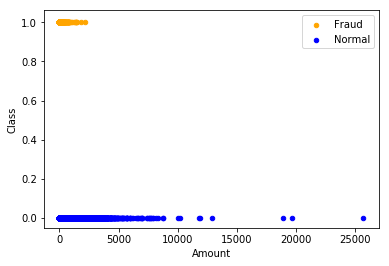

In [12]:
ax = fraud.plot.scatter(x='Amount',y='Class',color='Orange',label='Fraud')
non_frauds.plot.scatter(x='Amount',y='Class',color='Blue',label='Normal',ax=ax)
plt.show()

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [17]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

Score: 0.9992676785409749


In [18]:
y_predicted=np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
